# Test za različne metode optimalnega števila stolpcev

Ta datoteka vsebuje teste za različne izbire optimalnega števila stolpcev. Izbire so implementirane v datoteki [optimalBinNumber.py](optimalBinNumber.py). Pogledali si bomo naslednje izbire:
- square-root,
- Rice,
- Sturges,
- Doane,
- Scoot,
- Freedmann-Diaconis.

To so standardne metode za iskanje optimalnega števila stolpcev. Ideja je mogoče narediti še boljšo metodo.

Najprej si poglejmo prve tri izmed naštetih metod. Metode si bomo pogledali na normalni in Pareto porazdelitvi s 1000 podatki.

In [4]:
from optimalBinNumber import optBinNum
import numpy as np
import matplotlib.pyplot as plt

def izris(pdf1, data1, pdf2, data2, metoda):
    plt.figure(figsize=(15,5))
    # normalna
    plt.subplot(121)
    n1 = optBinNum(data1, choice=metoda)
    plt.title("{} - normalna (n={})".format(metoda, str(n1)))
    plt.hist(data1, bins=n1, density=1)
    x = np.linspace(-5,5,1000)
    plt.plot(x, pdf1(x))
    # pareto
    plt.subplot(122)
    n2 = optBinNum(data2, choice=metoda)
    plt.title("{} - pareto (n={})".format(metoda, str(n2)))
    plt.hist(data2, bins=n2, density=1)
    x = np.linspace(1,10,1000)
    plt.plot(x, pdf2(x))
    plt.xlim(right=10)

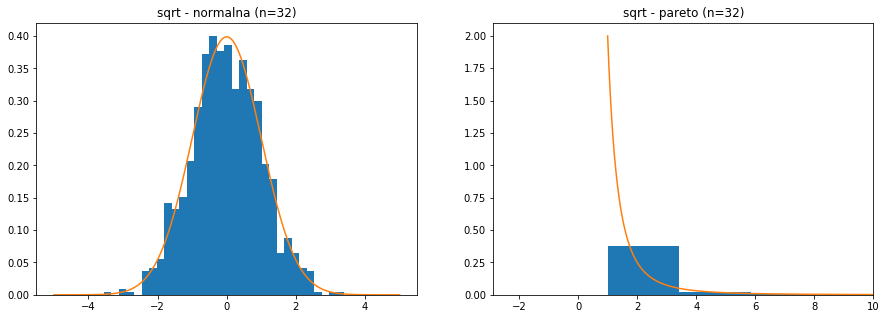

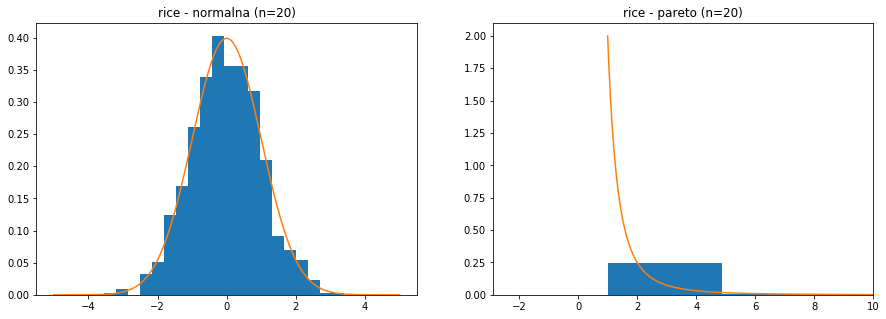

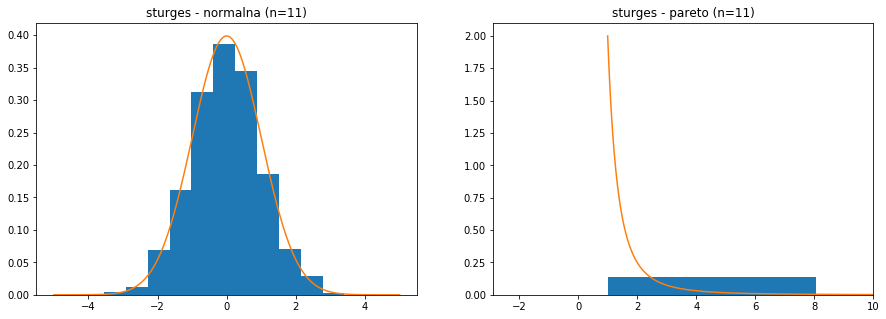

In [6]:
from scipy import stats

# stevilo sample-ov
n = 1000

normal_pdf = lambda x: stats.norm.pdf(x,0,1)
normal_data = np.random.normal(0,1,n)

pareto_pdf = lambda x: stats.pareto.pdf(x,2) # ima zacetek v 1
pareto_data = np.random.pareto(2,n)+1 # 1 pristejemo, da zacnemo v 1

izris(normal_pdf, normal_data, pareto_pdf, pareto_data, "sqrt")
izris(normal_pdf, normal_data, pareto_pdf, pareto_data, "rice")
izris(normal_pdf, normal_data, pareto_pdf, pareto_data, "sturges")

Očitno je, da te metode zelo slabo delajo na porazdelitvah z velikimi repi, saj upoštevajo le velikost vzorca, ne pa njegovih značilnosti. Zelo dobro pa delajo na normalnih porazdelitvah.

Doane izbiro sem črtal iz seznama.

Sedaj si poglejmo še 2 metodi: Scoot in Freedman diaconis na istih primerih.

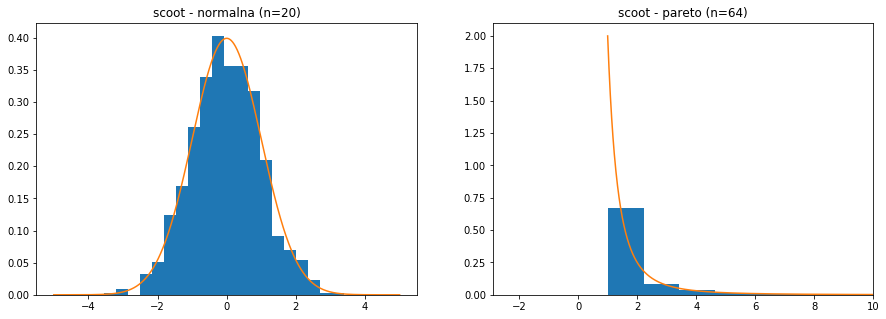

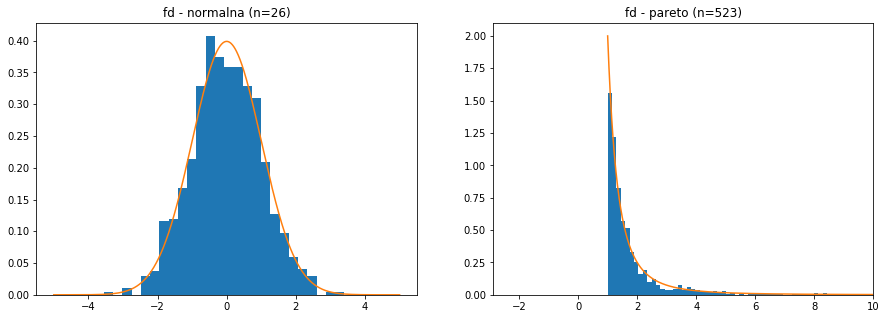

In [7]:
izris(normal_pdf, normal_data, pareto_pdf, pareto_data, "scoot")
izris(normal_pdf, normal_data, pareto_pdf, pareto_data, "fd")

Vidimo, kako dobro se obnašata metodi Scoot in FD v primeru pareto porazdelitve - vsaj na oko se zelo dobro prilegajo teoretični porazdelitvi. Metoda Scoot je tudi najbolj splošno uporabljena. Torej, če želimo izboljšati metodo za iskanje optimalnega števila stolpcev, bo naše merilo verjetno Scootova ali FD izbira. Je pa pri FD metodi zelo veliko število stolpcev, posledično veliko praznih stolpcev, zato moramo res imeti pregled nad podatki.

Poizkusimo sedaj še lastno KL-metodo.

iskanje od 10 do 100:
10,11,

/Users/aljazostrez/Documents/GitHub/Renyi-entropy-and-divergence/optimalBinNumber.py:80: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  return scipy.integrate.quad(integrand, a, b)[0]


12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,

iskanje od 10 do 100:
10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,



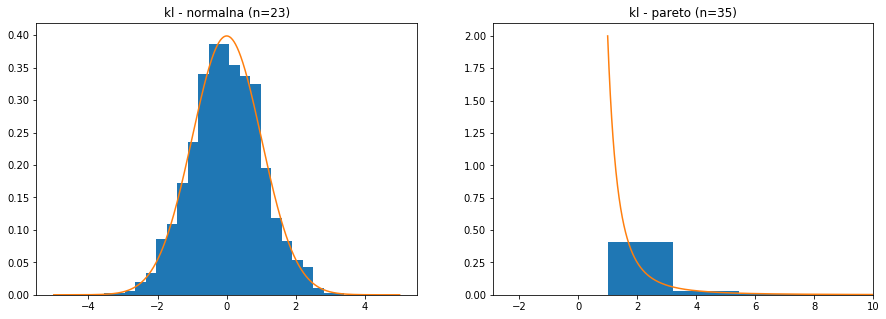

In [8]:
izris(normal_pdf, normal_data, pareto_pdf, pareto_data, "kl")

Jasno je, da potrebujemo za oceno naše metode in primerjave med ostalimi izbirami narediti test še na drugih porazdelitvah.